<a href="https://colab.research.google.com/github/IzabelaMarina/Projetos-Turing-Academy/blob/main/Projeto2TA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classificação de trabalhadores que desejam mudar de carreira

Esse notebook tem por objetivo treinar modelos capazes de classificar indivíduos de acordo com seu desejo de mudar, ou não, de carreira, a partir de outros dados relacionados à carreira em atual desenvolvimento.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#modelos que serão utilizados
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
df = pd.read_csv('/content/train.csv') 
df.head() 

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

#Limpeza de dados categóricos

In [4]:
df.describe(include = ['object'])

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


##Tamanho da empresa

In [5]:
print("Classificações da coluna \'company_size\':" ) #descrição
print(pd.Series(df.company_size.unique()))

Classificações da coluna 'company_size':
0          NaN
1        50-99
2          <10
3       10000+
4    5000-9999
5    1000-4999
6        10/49
7      100-500
8      500-999
dtype: object


In [6]:
df["company_size"].replace("10/49","10-49",inplace = True)

print("Classificações da coluna \'company_size\':" )
print(pd.Series(df.company_size.unique()))

Classificações da coluna 'company_size':
0          NaN
1        50-99
2          <10
3       10000+
4    5000-9999
5    1000-4999
6        10-49
7      100-500
8      500-999
dtype: object


##Tratamento de NaNs

In [7]:
df.isnull().sum() #identifica os dados nulos

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [8]:
df_object = df.drop(columns=['enrollee_id','city','city_development_index','relevent_experience','training_hours', 'target'])
df_object[df_object.isnull().all(axis=1)] #para conferir se nao existe linhas com todos os dados categóricos nulos

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job


Substituir os valores nulos das colunas com poucos NaN's (<10% da moda) pela moda da coluna

In [9]:
df.update(df['experience'].fillna(df['experience'].mode()[0], inplace=True))
df.update(df['last_new_job'].fillna(df['last_new_job'].mode()[0], inplace=True))
df.update(df['enrolled_university'].fillna(df['enrolled_university'].mode()[0], inplace=True))
df.update(df['education_level'].fillna(df['education_level'].mode()[0], inplace=True))
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2813
experience                   0
company_size              5938
company_type              6140
last_new_job                 0
training_hours               0
target                       0
dtype: int64

In [10]:
falta_tipo = df["company_type"].isnull()
falta_tamanho = df["company_size"].isnull()
df[falta_tipo & falta_tamanho]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
10,29452,city_21,0.624,NaN,No relevent experience,Full time course,High School,NaN,2,NaN,NaN,never,32,1.0
13,5826,city_21,0.624,Male,No relevent experience,no_enrollment,Graduate,NaN,2,NaN,NaN,never,24,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19144,17191,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,never,48,1.0
19151,11385,city_149,0.689,Male,No relevent experience,Full time course,Graduate,NaN,2,NaN,NaN,1,60,0.0
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0


In [11]:
primario = df['education_level'] == 'Primary School'
medio = df['education_level'] == 'High School'
sem_major = df[primario | medio] #dados de participantes que não frequentaram o ensino superior, portanto não possuem 'major_discipline'
for index in sem_major.index:
  df.loc[index,'major_discipline'] = 'No Major' #substituição dos dados nulos

df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline           488
experience                   0
company_size              5938
company_type              6140
last_new_job                 0
training_hours               0
target                       0
dtype: int64

A coluna 'major_discipline' passou a ter poucos valores NaN's, que serão substituídos pela moda :)

In [12]:
df.update(df['major_discipline'].fillna(df['major_discipline'].mode()[0], inplace=True))
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size              5938
company_type              6140
last_new_job                 0
training_hours               0
target                       0
dtype: int64

A partir daqui eu não tenho muito o que fazer além de jogar a moda nos NaN's novamente, dado que eles representam uma porcentagem significativa dos valores nessas colunas que sobraram, seria provavelmente melhor estudar correlações e montar um modelo preditivo para preencher os dados, mas acho que esse não é bem o objetivo desse projeto, portanto vou na alternativa fácil.
Talvez eu me aventure nessa outra possibilidade mais pra frente :)

In [13]:
df.update(df['gender'].fillna(df['gender'].mode()[0], inplace=True)) #susbstituição nas Nan's da coluna 'Gênero' pela moda ('Male')

Sobre 'company_type' e 'company_size': existe uma correlação que é legal de ser explorada e o que vai ser feito é que os valores nulos de uma coluna vão ser substituídos pela moda e a substituição desses valores na outra coluna vai depender da primeira, mas antes é preciso analisar essa correlação:

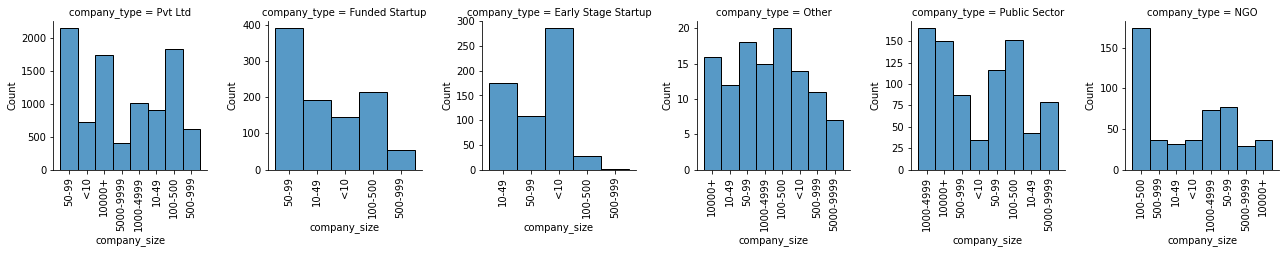

In [14]:
#Análise da forma como o tipo de empresa afeta o tamanho.
X = sns.FacetGrid(df.dropna(),col='company_type', sharex=False,sharey=False)
X.map(sns.histplot,'company_size')
for ax in X.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)
plt.show()

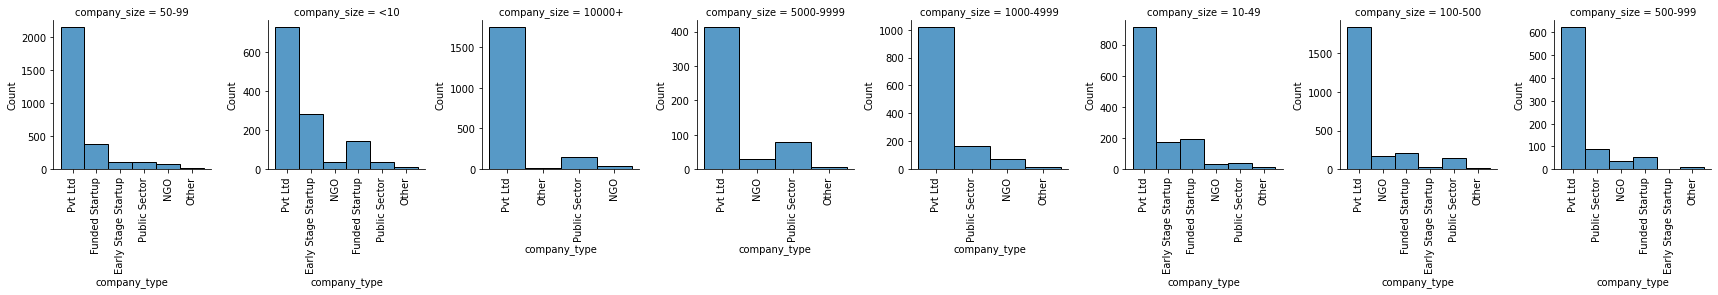

In [15]:
#Análise da forma como o tamanho da empresa afeta o tipo.
X = sns.FacetGrid(df,col='company_size',sharex=False,sharey=False)
X.map(sns.histplot,'company_type')
for ax in X.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)
plt.show()

Dá pra ver que o tipo de empresa é mais significativo pra determinação da moda do tamanho (existe uma variação mais clara nos primeiros gráficos) do que o contrário, portanto os valores nulos do tipo serão preenchidos pela moda e, então os valores nulos do tamanho serão preenchidos pela moda de cada tipo:

In [16]:
df.update(df['company_type'].fillna(df['company_type'].mode()[0], inplace=True)) 

In [17]:
print("Classificações da coluna \'company_type\':" ) #só pra relembrar os valores que vou ter que usar ;)
print(pd.Series(df.company_type.unique()))

Classificações da coluna 'company_type':
0                Pvt Ltd
1         Funded Startup
2    Early Stage Startup
3                  Other
4          Public Sector
5                    NGO
dtype: object


In [18]:
pvt = df['company_type'] == 'Pvt Ltd'
nulo = df['company_size'].isnull()
privada = df[pvt & nulo]
for index in privada.index:
 df.loc[index,'company_size'] = df[pvt]['company_size'].mode()[0] #substituição dos dados nulos em empresas privadas

fundstup = df['company_type'] == 'Funded Startup'
funded = df[fundstup & nulo]
for index in funded.index:
 df.loc[index,'company_size'] = df[fundstup]['company_size'].mode()[0] #substituição dos dados nulos em startups

eastup = df['company_type'] == 'Early Stage Startup'
early = df[eastup & nulo]
for index in early.index:
 df.loc[index,'company_size'] = df[eastup]['company_size'].mode()[0] #substituição dos dados nulos em startups recentes

ps = df['company_type'] == 'Public Sector'
public = df[ps & nulo]
for index in public.index:
 df.loc[index,'company_size'] = df[ps]['company_size'].mode()[0] #substituição dos dados nulos em empresas públicas
 
ngo = df['company_type'] == 'NGO'
ong = df[ngo & nulo]
for index in ong.index:
 df.loc[index,'company_size'] = df[ngo]['company_size'].mode()[0] #substituição dos dados nulos em ONGs

other = df['company_type'] == 'Other'
outras = df[other & nulo]
for index in outras.index:
 df.loc[index,'company_size'] = df[other]['company_size'].mode()[0] #substituição dos dados nulos nos demais tipos

df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

Resolvido o problema dos dados nulos ;)

#Limpeza de dados numéricos

In [19]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


Parece tudo ok :)

#Análise dos dados

Considerando que o número de linhas com target = 0 é muito maior do que o de linhas com target = 1, todas as seguintes análises serão feitas com respeito às proporções.

##Relação com o índice de desenvolvimento da cidade

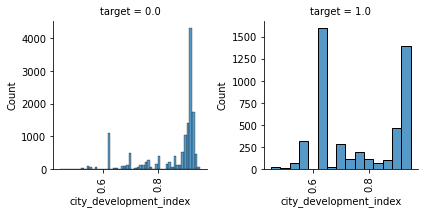

In [20]:
X = sns.FacetGrid(df.dropna(),col='target', sharex=False,sharey=False)
X.map(sns.histplot,'city_development_index')
for ax in X.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)
plt.show()

Existe um pico em um índice < 0.7 para pessoas que buscam mudança de emprego que é, proporcionalmente, muito maior do que a concentração de pessoas que não buscam mudança vivendo em cidades com o mesmo valor de desenvolvimento, isso pode indicar uma importante correlação. No entanto, mesmo que esse seja o caso, essa correlação não é definitiva (não explica o fenômeno totalmente), uma vez que existem picos para índices > 0.8 para ambos os casos.

##Relação com gênero

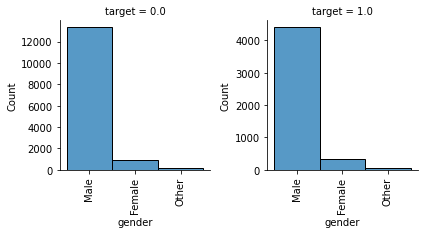

In [21]:
X = sns.FacetGrid(df.dropna(),col='target', sharex=False,sharey=False)
X.map(sns.histplot,'gender')
for ax in X.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)
plt.show()

A questão do gênero parece ter pouca influência nesse caso, ambos os gráficos possuem um visual muito parecido.

##Relação com a existência de experiência

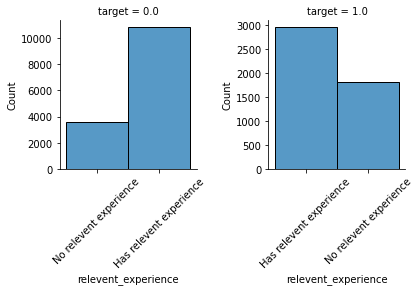

In [22]:
X = sns.FacetGrid(df.dropna(),col='target', sharex=False,sharey=False)
X.map(sns.histplot,'relevent_experience')
for ax in X.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(45)
plt.show()

Não ter experiência é uma característica mais significativa entre aqueles que desejam mudar de emprego, ainda que ter experiência seja a regra tanto para um caso quanto para o outro.

##Relação com estar ligado a uma universidade atualmente

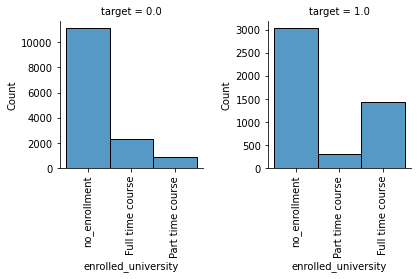

In [23]:
X = sns.FacetGrid(df.dropna(),col='target', sharex=False, sharey= False)
X.map(sns.histplot,'enrolled_university')
for ax in X.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)
plt.show()

Estar, atualmente, envolvido com um curso integral em uma universidade também parece exercer certa influência no desejo de mudar de emprego.

##Relação com o nível de educação

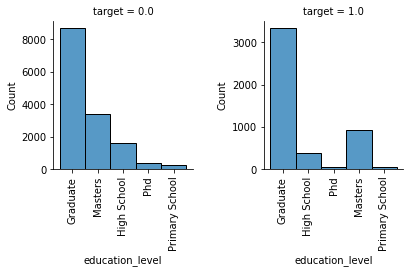

In [24]:
X = sns.FacetGrid(df.dropna(),col='target', sharex=False,sharey=False)
X.map(sns.histplot,'education_level')
for ax in X.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)
plt.show()

Existem pequenas diferenças entre os gráficos: para todo nível de educação diferente de graduação a porcentagem que eles representam do total é menor entre aqueles que desejam mudar de emprego, entretanto a correlação não é exatemente clara, não é possível afirmar, por exemplo, que quanto maior o nível de educação menor é o desejo de troca de emprego.

##Relação com área de conhecimento da graduação

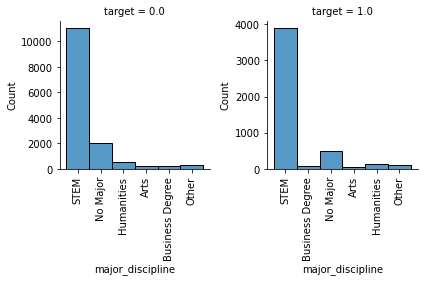

In [25]:
X = sns.FacetGrid(df.dropna(),col='target', sharex=False,sharey=False)
X.map(sns.histplot,'major_discipline')
for ax in X.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)
plt.show()

Excluindo a interferência das graduações em STEM, que representam uma parte muito grande das formações em ambos os casos:

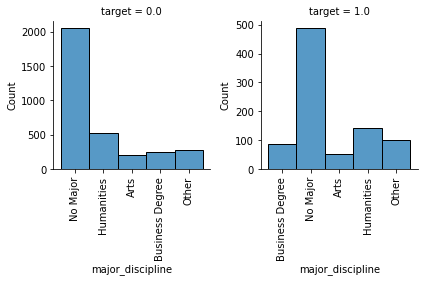

In [26]:
X = sns.FacetGrid(df[df['major_discipline'] != 'STEM'].dropna(),col='target', sharex=False,sharey=False)
X.map(sns.histplot,'major_discipline')
for ax in X.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)
plt.show()

A área de conhecimento da graduação não parece exercer muita influência de qualquer forma.

##Relação com tempo de experiência

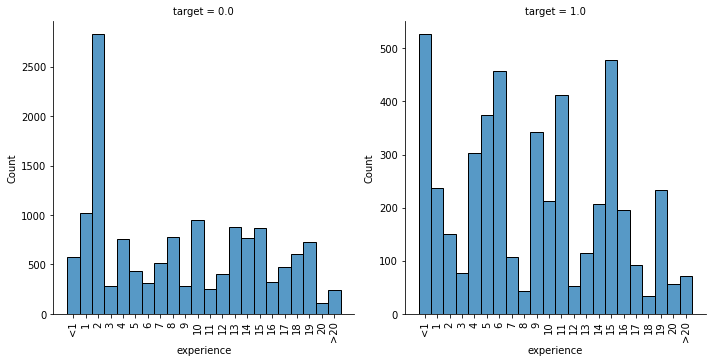

In [27]:
X = sns.FacetGrid(df.dropna(),col='target', sharex=False, sharey=False, height=5)
X.map(sns.histplot,'experience')
for ax in X.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)
X.set_xticklabels(labels=['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20'])
plt.show()

Existe uma diferença de padrão, mas a correlação não é clara.

##Relação com tipo de empresa

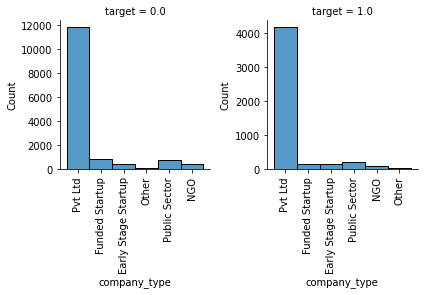

In [28]:
X = sns.FacetGrid(df.dropna(),col='target', sharex=False, sharey=False)
X.map(sns.histplot,'company_type')
for ax in X.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)
plt.show()

O tipo de empresa não parece exercer muita influência no target. Há uma pequena variação para "funded startup" que representa uma menor porcentagem do total entre aqueles que desejam mudar de emprego, mas nada muito significativo.

##Relação com o tamanho da empresa

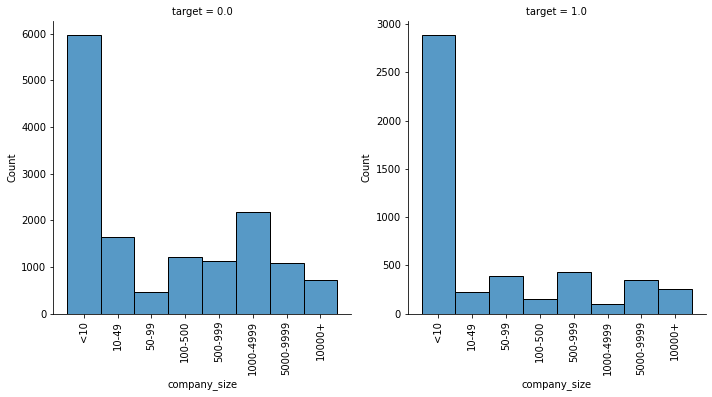

In [29]:
X = sns.FacetGrid(df.dropna(),col='target', sharex=False, sharey=False, height=5)
X.map(sns.histplot,'company_size')
for ax in X.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)
X.set_xticklabels(labels=['<10','10-49','50-99','100-500','500-999','1000-4999','5000-9999','10000+'])
plt.show()

Existe uma diferença no padrão, mas a correlação não é clara.

##Relação com tempo desempregado

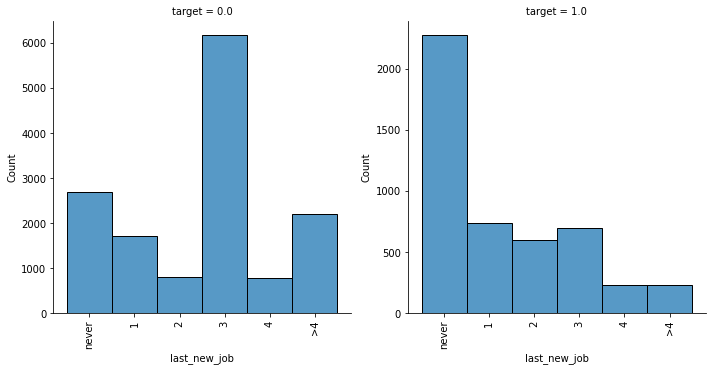

In [30]:
X = sns.FacetGrid(df.dropna(),col='target', sharex=False, sharey=False, height=5)
X.map(sns.histplot,'last_new_job')
for ax in X.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)
X.set_xticklabels(labels=['never','1','2','3','4','>4'])
plt.show()

Parece haver certa tendência que aqueles que passaram mais tempo desempregado expressem menos vontade em mudar de emprego.

##Relação com horas de treinamento

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


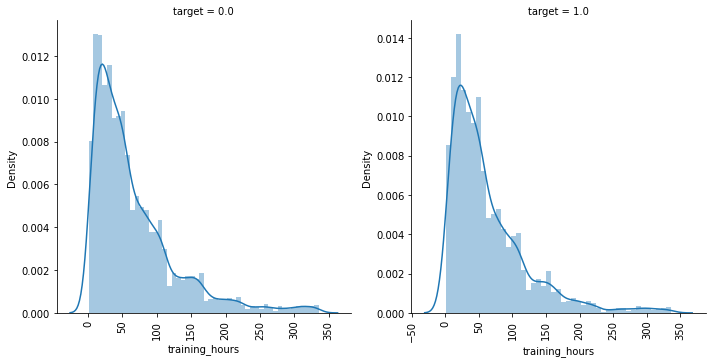

In [31]:
X = sns.FacetGrid(df.dropna(),col='target', sharex=False, sharey=False, height=5)
X.map(sns.distplot,'training_hours')
for ax in X.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)
plt.show()

As distribuições são muito parecidas nos dois casos, não parece haver influência.

In [32]:
df = df.drop(columns=['city','gender','major_discipline','company_type','training_hours']) #excluindo as features sem correlação do dataframe

A feature 'city' também será excluída, porque aquilo que interessa nela já está sendo representado pela feature 'city_development_index'.

#Modelo de Classificação: Regressão Logística

##Preparação do dataframe

In [33]:
one_hot_encoding = pd.get_dummies(df) #transformando variáveis categóricas em variáveis numéricas
one_hot_encoding


,enrollee_id,city_development_index,target,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,experience_1,experience_10,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,company_size_10-49,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,8949,0.920,1.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,29725,0.776,0.0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,11561,0.624,0.0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33241,0.789,1.0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,666,0.767,0.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.878,1.0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
19154,31398,0.920,1.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
19155,24576,0.920,0.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
19156,5756,0.802,0.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [34]:
X = one_hot_encoding.drop('target', axis=1) # Cria uma cópia do dataset sem a coluna target
y = one_hot_encoding['target']

print(y.value_counts())

# Reservamos 30% dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.3, stratify=y)

0.0    14381
1.0     4777
Name: target, dtype: int64


##Treinamento dos modelos

###Regressão Logística

In [35]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [36]:
from sklearn.metrics import accuracy_score

y_train_predict = logreg.predict(X_train)
y_test_predict = logreg.predict(X_test)

print(f'Acurácio no treino: {accuracy_score(y_train, y_train_predict)}')
print(f'Acurácio no teste: {accuracy_score(y_test, y_test_predict)}')

Acurácio no treino: 0.7506338553318419
Acurácio no teste: 0.7506958942240779


As acurácias são consistentes, mas baixas, portanto as features sem correlação clara também serão excluídas do dataframe para ver se a acurácia do modelo melhora :)

In [37]:
df = df.drop(columns=['education_level','experience','company_size'])

In [40]:
one_hot_encoding = pd.get_dummies(df) #transformando variáveis categóricas em variáveis numéricas
one_hot_encoding


,enrollee_id,city_development_index,target,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,8949,0.920,1.0,1,0,0,0,1,1,0,0,0,0,0
1,29725,0.776,0.0,0,1,0,0,1,0,0,0,0,1,0
2,11561,0.624,0.0,0,1,1,0,0,0,0,0,0,0,1
3,33241,0.789,1.0,0,1,0,0,1,0,0,0,0,0,1
4,666,0.767,0.0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.878,1.0,0,1,0,0,1,1,0,0,0,0,0
19154,31398,0.920,1.0,1,0,0,0,1,0,0,0,1,0,0
19155,24576,0.920,0.0,1,0,0,0,1,0,0,0,1,0,0
19156,5756,0.802,0.0,1,0,0,0,1,0,1,0,0,0,0


In [41]:
X = one_hot_encoding.drop('target', axis=1) # Cria uma cópia do dataset sem a coluna target
y = one_hot_encoding['target']

# Reservamos 30% dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.3, stratify=y)

In [42]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [43]:
from sklearn.metrics import accuracy_score

y_train_predict = logreg.predict(X_train)
y_test_predict = logreg.predict(X_test)

print(f'Acurácio no treino: {accuracy_score(y_train, y_train_predict)}')
print(f'Acurácio no teste: {accuracy_score(y_test, y_test_predict)}')

Acurácio no treino: 0.7506338553318419
Acurácio no teste: 0.7506958942240779


Houve um aumento, porém pouco significativo :/
Outros modelos serão testados para tentar garantir as melhores métricas na classificação.

###KNN

In [44]:
your_K = 10
model = KNeighborsClassifier(n_neighbors = your_K)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(y_predict)

[0. 0. 0. ... 0. 0. 0.]


In [45]:
print(accuracy_score(y_test, y_predict))

0.7418232428670842


###Árvore de Decisão

In [46]:
from sklearn.tree import DecisionTreeClassifier

clf_model = DecisionTreeClassifier(
    criterion="gini",
    random_state=42,
    max_depth=25,
    min_samples_leaf=5
)

clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=25, min_samples_leaf=5, random_state=42)

In [47]:
print(accuracy_score(y_test, y_predict))

0.7418232428670842


###Naive Bayes

In [48]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_predict = bayes.predict(X_test)
print(y_predict)

[0. 1. 0. ... 1. 0. 0.]


In [49]:
print(accuracy_score(y_test, y_predict))

0.7280793319415448


##Checagem das métricas

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

Text(0.5, 1.0, 'Naive Bayes')

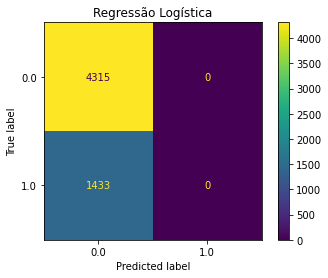

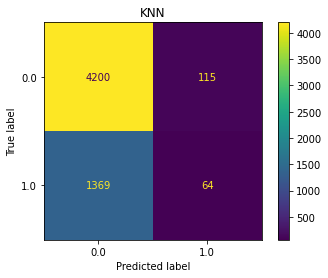

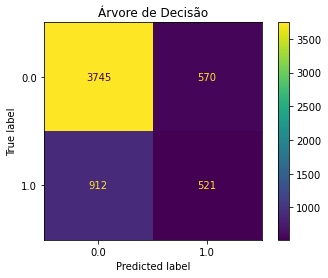

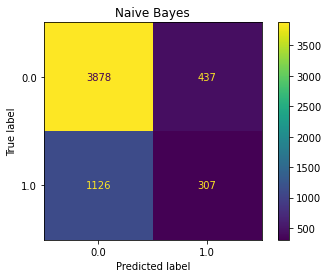

In [50]:
plot_confusion_matrix(logreg, X_test, y_test, values_format='d')
plt.title('Regressão Logística')

plot_confusion_matrix(model, X_test, y_test, values_format='d')
plt.title('KNN')

plot_confusion_matrix(clf_model, X_test, y_test, values_format='d')
plt.title('Árvore de Decisão')

plot_confusion_matrix(bayes, X_test, y_test, values_format='d')
plt.title('Naive Bayes')

Há claramente um problema com o modelo de regressão logística, uma vez que o modelo classifica todos os dados com target = 0. 
Devido à grande diferença de tamanho das amostras com target = 0 e target = 1, ainda que os dataframes de treino e teste tenham sido estratificados, o modelo acabou enviezado. Algo parecido ocorre com o KNN: em k's pequenos a acurácia é baixa e para k's maiores o modelo tende a prever sempre target = 0.
Estratégias simples para contornar esse problema como under e oversampling não foram eficientes.

Os modelos de árvore de decisão e Naive Bayes mantém acurácias próximas dos modelos já citado e não apresentam o mesmo problema, portanto parecem escolhas mais sensatas.

In [51]:
# Análise de outras métricas

y_pred1 = logreg.predict(X_test)
print('Regressão Logística')
print(classification_report(y_test, y_pred1))

y_pred2 = model.predict(X_test)
print('KNN')
print(classification_report(y_test, y_pred2))

y_pred3 = clf_model.predict(X_test)
print('Árvore de Decisão')
print(classification_report(y_test, y_pred3))

y_pred4 = bayes.predict(X_test)
print('Naive Bayes')
print(classification_report(y_test, y_pred4))

Regressão Logística
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      4315
         1.0       0.00      0.00      0.00      1433

    accuracy                           0.75      5748
   macro avg       0.38      0.50      0.43      5748
weighted avg       0.56      0.75      0.64      5748



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN
              precision    recall  f1-score   support

         0.0       0.75      0.97      0.85      4315
         1.0       0.36      0.04      0.08      1433

    accuracy                           0.74      5748
   macro avg       0.56      0.51      0.46      5748
weighted avg       0.66      0.74      0.66      5748

Árvore de Decisão
              precision    recall  f1-score   support

         0.0       0.80      0.87      0.83      4315
         1.0       0.48      0.36      0.41      1433

    accuracy                           0.74      5748
   macro avg       0.64      0.62      0.62      5748
weighted avg       0.72      0.74      0.73      5748

Naive Bayes
              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83      4315
         1.0       0.41      0.21      0.28      1433

    accuracy                           0.73      5748
   macro avg       0.59      0.56      0.56      5748
weighted avg       0.68      0.73      0

As métricas de todos os modelos treinados são muito próximas, mas Regressão Logística e KNN possuem um problema já apontado, portanto, por hora, a melhor escolha parece ser o modelo de Árvore de Decisão, que possui as melhores métricas na predição de positivos e mantém as boas métricas na predição de negativos apresentada pelos demais modelos.

Futuramente pretendo voltar a esse projeto, para tentar resolver a questão do desbalanceamento de dados com técnicas menos simples do que estratificação das amostras, under e oversampling e verificar se isso resulta em melhores métricas, mas por enquanto essa é a conclusão desse projeto :)